In [0]:
import torch
import random
import helpers as h
import modules as m
import matplotlib.pyplot as plt

In [0]:
#Setting a random seed and generating the data

torch.manual_seed(1)
inputs, targets = h.generate_disc_data(n=1000)

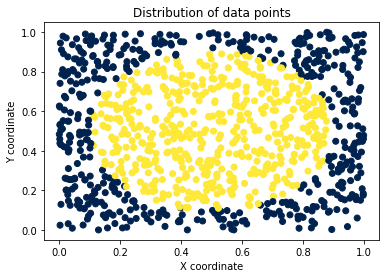

In [3]:
#Plot the distribution of the generated data, to see how it looks like

plt.scatter(inputs[:,0].tolist(), inputs[:,1].tolist(), c = targets.tolist(), cmap = 'cividis')
#plt.savefig('data.png')
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.title("Distribution of data points")
plt.show()

In [0]:
#Split the data into train, validation and test sets
train_data, train_targets,\
  validation_data, validation_targets, test_data, test_targets = h.split_data(inputs, targets, 0.7, 0.1, 0.2)

In [0]:
#Data normalization
mean, std = inputs.mean(), inputs.std()

train_data.sub_(mean).div_(std)
validation_data.sub_(mean).div_(std)
test_data.sub_(mean).div_(std)

In [0]:
#Instantiate the model

Input_Units = 2
Output_Units = 2
Hidden_Units = 25

model = m.Sequential(m.Linear(Input_Units,Hidden_Units),
                     m.ReLU(),
                     m.Linear(Hidden_Units,Hidden_Units),
                     m.ReLU(),
                     m.Linear(Hidden_Units,Hidden_Units),
                     m.Tanh(),
                     m.Linear(Hidden_Units,Output_Units),
                     m.Tanh()
                     )

#Instantiate the optimizer
lr = 0.00095
sgd = m.SGD(params = model.param(), lr = lr)

In [7]:
#Train the model
EPOCHS = 150

model, train_error, validation_error = h.train_model(train_data, train_targets,\
                                        validation_data, validation_targets, model, sgd, nb_epochs = EPOCHS)

Epoch : 0, Train_loss 1626.10, Train_error 32.29%, Validation_error 16.00%
Epoch : 10, Train_loss 225.78, Train_error 4.71%, Validation_error 7.00%
Epoch : 20, Train_loss 248.00, Train_error 6.14%, Validation_error 5.00%
Epoch : 30, Train_loss 162.56, Train_error 3.43%, Validation_error 7.00%
Epoch : 40, Train_loss 163.86, Train_error 3.29%, Validation_error 4.00%
Epoch : 50, Train_loss 168.94, Train_error 4.00%, Validation_error 5.00%
Epoch : 60, Train_loss 149.57, Train_error 3.43%, Validation_error 4.00%
Epoch : 70, Train_loss 146.45, Train_error 3.00%, Validation_error 6.00%
Epoch : 80, Train_loss 142.50, Train_error 2.71%, Validation_error 5.00%
Epoch : 90, Train_loss 178.88, Train_error 4.29%, Validation_error 4.00%
Epoch : 100, Train_loss 139.15, Train_error 3.14%, Validation_error 6.00%
Epoch : 110, Train_loss 134.68, Train_error 3.00%, Validation_error 6.00%
Epoch : 120, Train_loss 129.56, Train_error 3.14%, Validation_error 4.00%
Epoch : 130, Train_loss 117.05, Train_error 2.

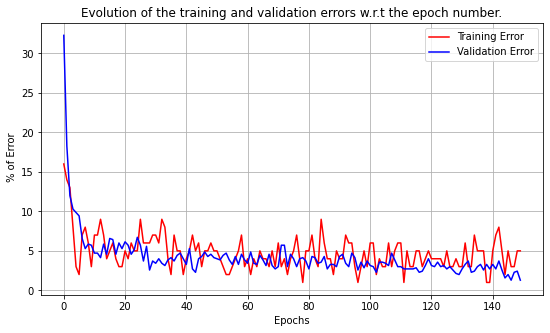

In [8]:
#Plot both train and validation errors wrt the number of epochs

fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot(111)
ax.set_title('Evolution of the training and validation errors w.r.t the epoch number.')
plt.plot(validation_error,color='red')
plt.plot(train_error,color='blue')
plt.legend(['Training Error', 'Validation Error'])
ax.set_xlabel('Epochs')
ax.set_ylabel(' % of Error')
#plt.savefig('Error_results.png')
plt.grid()
plt.show()

In [9]:
h.test_model(model, test_data, test_targets)

test_error 3.00%
